In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

In [3]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [4]:
events= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\eventorg.csv",index_col=0)
#Dataframe with all events (descriptive categories, locations, and event organizers)

# All Parks Dataset
__Goal:__ To create a dataset with different metrics that allows for comparison across all New York City Parks.

__Columns:__
* AVGEV: average number of events per year (float)
* TOTALEV: total number of events from 2013-2018 (float)
* CATEG: number of descriptive categories used (float)
* STAKEHOLD: number of stakeholders (float)
* ACRES: total park acres (float)

In [5]:
events['GISPROPNUM']=events['park_id']

In [6]:
allparks= pd.merge(parks,events,on='GISPROPNUM',how='left')

In [7]:
t= pd.to_datetime(allparks['date'], format='%m/%d/%Y')
allparks['year']= t.dt.year

### Filters
* eventid: filter for only unique event_ids
* loc: filter to remove duplicated park_ids
* removes duplicated categories
* sets the date range 2013-2018

In [ ]:
allparks['event_organizer_clean']= allparks['event_organizer'].str.lower().str.replace('[.,;:)(]','')

In [50]:
eventid= (~allparks.duplicated('event_id'))
loc= (~allparks.duplicated('park_id'))
categ= (~allparks.duplicated('category'))
org= (~allparks.duplicated('event_organizer_clean'))
daterange= (allparks['year']>=2013)&(allparks['year']<2019)

### Metrics

__Acreage__
* Total park acreage

In [9]:
ACRES= parks[['GISPROPNUM','ACRES']].copy()
ACRES.index= ACRES['GISPROPNUM']
ACRES.drop('GISPROPNUM',axis=1,inplace=True)

__Average number of events and total number of events__
* Average number of events per year: total events/6
* Total events: all events 2013-2018

In [10]:
AVGEV= allparks[eventid&daterange].groupby('GISPROPNUM').agg({'event_id':'count'})['event_id']/6

In [11]:
AVGEV= AVGEV.to_frame().rename(columns={'event_id':'AVGEV'})

In [12]:
AVGEV

,AVGEV
GISPROPNUM,
B001,0.333333
B002,2.666667
B003,8.500000
B007,1.000000
B008,5.666667
B010,8.000000
B012,17.333333
B016,9.166667
B018,25.166667


In [13]:
TOTALEV= allparks[eventid&daterange].groupby('GISPROPNUM').agg({'event_id':'count'}).rename(columns={'event_id':'TOTALEV'})

In [14]:
TOTALEV

,TOTALEV
GISPROPNUM,
B001,2
B002,16
B003,51
B007,6
B008,34
B010,48
B012,104
B016,55
B018,151


__Number of Unique Descriptive Categories per Park__

In [15]:
CATEG= allparks[daterange].groupby('GISPROPNUM')['category'].value_counts().unstack().count(axis=1).to_frame().rename(columns={0:'CATEG'})

In [16]:
CATEG

,CATEG
GISPROPNUM,
B001,4
B002,17
B003,8
B007,12
B008,27
B010,23
B012,27
B016,27
B018,22


In [17]:
#Test to make sure the calculation is correct
allparks[allparks['GISPROPNUM']=='B002']['category'].unique().shape

(17,)

__Number of Stakeholders per Park__

In [19]:
#All event organizers
len(allparks[daterange]['event_organizer_clean'].unique())

1606

In [62]:
STAKEHOLD= allparks[daterange].groupby('GISPROPNUM')['event_organizer_clean'].value_counts().unstack().count(axis=1).to_frame().rename(columns={0:'STAKEHOLD'})

In [63]:
STAKEHOLD

,STAKEHOLD
GISPROPNUM,
B001,1
B002,8
B003,7
B007,5
B008,9
B010,7
B012,13
B016,17
B018,7


__Parks per Stakeholder__
* All unique organizers (lower case stripped of punctuation) and the parks in which they plan events.

In [22]:
PARKSPERORG= allparks.groupby('event_organizer_clean')['GISPROPNUM'].value_counts().unstack().count(axis=1).to_frame().rename(columns={0:'PARKSPERORG'})

In [23]:
local= PARKSPERORG[PARKSPERORG['PARKSPERORG']<2].index.tolist()
nonloc= PARKSPERORG[PARKSPERORG['PARKSPERORG']>=2].index.tolist()

In [37]:
allparks.loc[allparks['event_organizer_clean'].isin(local),'local']=1
allparks.loc[allparks['event_organizer_clean'].isin(nonloc),'local']=0

In [53]:
allparks[(allparks['local']==0)&org].shape

(272, 44)

__Local Share__
* Local: all event organizers that only program in one park.

In [77]:
LOCALORG= allparks[daterange].groupby(['GISPROPNUM','event_organizer_clean']).agg({'local':sum})\
                                            .replace(0,np.nan).unstack().count(axis=1).to_frame().rename(columns={0:'LOCAL'})
LOCALORG

,LOCAL
GISPROPNUM,
B001,0
B002,3
B003,2
B007,0
B008,1
B010,1
B012,4
B016,10
B018,2


In [78]:
final= pd.concat([AVGEV,TOTALEV,CATEG,STAKEHOLD,LOCALORG,ACRES],axis=1,sort=False).fillna(0)

__Per Acre Metrics__
* AVGEV_PACRE: Average number of events per year per acre
* TOTALEV_PACRE: Total number of events per acre
* CATEG_PACRE: Unique category descriptions per acre

In [80]:
final['AVGEV_PACRE']=final['AVGEV']/final['ACRES']
final['TOTALEV_PACRE']=final['TOTALEV']/final['ACRES']
final['CATEG_PACRE']=final['CATEG']/final['ACRES']

__Per Event Metrics__
* CATEG_PEV: Unique category descriptions/total number of events
* STAKEHOLD_PEV: Total number of stakeholders/total number of events
* LOCAL_PEV: Total number of local stakeholders/total number of events

In [117]:
final['CATEG_PEV']=final['CATEG']/final['TOTALEV']
final['STAKEHOLD_PEV']=final['STAKEHOLD']/final['TOTALEV']
final['LOCAL_PEV']=final['LOCAL']/final['TOTALEV']

In [118]:
final.dtypes

AVGEV            float64
TOTALEV          float64
CATEG            float64
STAKEHOLD        float64
LOCAL            float64
ACRES            float64
AVGEVPACRE       float64
TOTALEVPACRE     float64
CATEGPACRE       float64
CATEG_PEV        float64
STAKEHOLD_PEV    float64
LOCAL_PEV        float64
dtype: object

In [82]:
final

,AVGEV,TOTALEV,CATEG,STAKEHOLD,LOCAL,ACRES,AVGEVPACRE,TOTALEVPACRE,CATEGPACRE
B001,0.333333,2.0,4.0,1.0,0.0,0.896,0.372024,2.232143,4.464286
B002,2.666667,16.0,17.0,8.0,3.0,3.557,0.749695,4.498173,4.779308
B003,8.500000,51.0,8.0,7.0,2.0,1.711,4.967855,29.807130,4.675628
B007,1.000000,6.0,12.0,5.0,0.0,17.500,0.057143,0.342857,0.685714
B008,5.666667,34.0,27.0,9.0,1.0,10.555,0.536870,3.221222,2.558029
B010,8.000000,48.0,23.0,7.0,1.0,47.570,0.168173,1.009039,0.483498
B012,17.333333,104.0,27.0,13.0,4.0,7.047,2.459676,14.758053,3.831418
B016,9.166667,55.0,27.0,17.0,10.0,6.873,1.333721,8.002328,3.928416
B018,25.166667,151.0,22.0,7.0,2.0,132.200,0.190368,1.142209,0.166415
B019,7.333333,44.0,15.0,6.0,3.0,1.874,3.913198,23.479189,8.004269


### Correlation Matrix
Creates a correlation matrix and displays only rows/columns with correlations > 0.5

__Takeaway:__
* Stakeholders is highly correlated with categories Perhaps the more stakeholders involved, the greater diversity of event types.
* The trend holds when calculating stakeholders and categories per event. It is, however, a much weaker correlation. Still, the more stakeholders per event (more variety in the stakeholders planning events), the more category types per event (the greater the diversity in programming).

In [128]:
CORR= final.corr()
CORR[(CORR>0.5)&(CORR<0.999)].dropna(how='all').dropna(how='all',axis=1)

,AVGEV,TOTALEV,CATEG,STAKEHOLD,LOCAL,CATEG_PEV,STAKEHOLD_PEV
AVGEV,NaN,NaN,0.541925,0.535424,0.509319,NaN,NaN
TOTALEV,NaN,NaN,0.541925,0.535424,0.509319,NaN,NaN
CATEG,0.541925,0.541925,NaN,0.884603,0.753330,NaN,NaN
STAKEHOLD,0.535424,0.535424,0.884603,NaN,0.929266,NaN,NaN
LOCAL,0.509319,0.509319,0.753330,0.929266,NaN,NaN,NaN
CATEG_PEV,NaN,NaN,NaN,NaN,NaN,NaN,0.689291
STAKEHOLD_PEV,NaN,NaN,NaN,NaN,NaN,0.689291,NaN


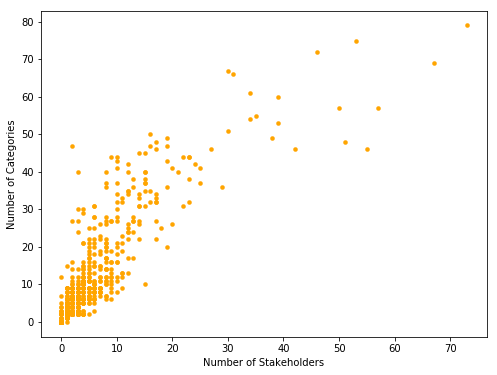

In [125]:
final.plot.scatter(x='STAKEHOLD',y='CATEG',c='orange',marker='o',linewidths=0.1,figsize=(8,6))
plt.xlabel('Number of Stakeholders')
plt.ylabel('Number of Categories');

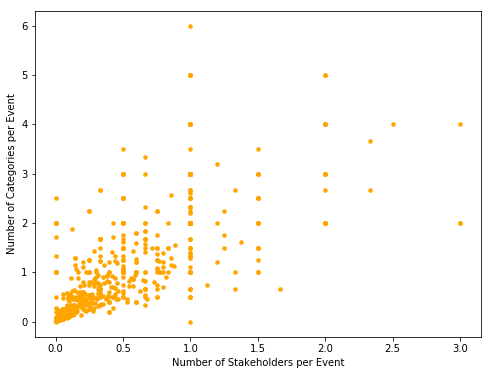

In [127]:
final.plot.scatter(x='STAKEHOLD_PEV',y='CATEG_PEV',c='orange',marker='o',linewidths=0.1,figsize=(8,6))
plt.xlabel('Number of Stakeholders per Event')
plt.ylabel('Number of Categories per Event');